In [222]:
import os
import pandas as pd
import datetime
from sqlalchemy import *
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import login_mysql
mydb, cursor = login_mysql.login()


%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = 'c:/Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

### 1. Main

In [2]:
qry1 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry1)
rlt1 = cursor.fetchall()

rlt1 = pd.DataFrame(rlt1)


In [3]:
qry2 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry2)
rlt2 = cursor.fetchall()

rlt2 = pd.DataFrame(rlt2)

#### 1) 인플루언서채널 구독자 현황

In [4]:
rlt1
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,MOCAR,2021-06-11,569000,566000,3000
1,MOTline,2021-06-11,474000,472000,2000
2,자동차의모든것,2021-06-11,256000,254000,2000
3,Auto View,2021-06-11,213000,212000,1000
4,NOBOSSINDUSTRY,2021-06-11,236000,235000,1000
5,Woopa TV,2021-06-11,626000,625000,1000
6,CARLAB,2021-06-11,67600,67400,200
7,Auto Press,2021-06-11,175000,175000,0
8,Motograph,2021-06-11,350000,350000,0


- 6월11일자는 크롤링 결과 이전일(6월4일) 대비 구독자수 3천명 증가
- 내가 구독하고 있는 인플루언서 채널 중 MOCAR, MOTline, 자동차의 모든것 등의 구독자수 증가
- 가장 구독자가 많은 채널이 아닌데 왜 늘었을까?

In [5]:
rlt2
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,Jeep,2021-06-11,16000,15700,300
1,renaultsamsungM,2021-06-11,11000,10800,200
2,BMW,2021-06-11,31700,31600,100
3,TOYOTA,2021-06-11,11300,11200,100
4,VOLVO,2021-06-11,2080,2070,10
5,FORD,2021-06-11,413,412,1
6,KIA,2021-06-11,128000,128000,0
7,LEXUS,2021-06-11,10400,10400,0
8,HYUNDAI,2021-06-11,0,0,0
9,Mercedes-Benz,2021-06-11,1650000,1650000,0


- 브랜드채널의 경우 지프, 르노삼성, BMW의 구독자 증가가 눈에 보임

In [6]:
# 채널별별 조회수 현황 및 증감

In [7]:
qry3 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry3)
rlt3 = cursor.fetchall()

rlt3 = pd.DataFrame(rlt3)

In [8]:
qry4 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry4)
rlt4 = cursor.fetchall()

rlt4 = pd.DataFrame(rlt4)

In [9]:
rlt3
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,MOTline,2021-06-11,156866993,154191416,2675577
1,MOCAR,2021-06-11,238264656,235950897,2313759
2,Woopa TV,2021-06-11,313286045,311512442,1773603
3,NOBOSSINDUSTRY,2021-06-11,83913203,83413932,499271
4,Auto View,2021-06-11,65870901,65453251,417650
5,자동차의모든것,2021-06-11,72302001,71899729,402272
6,Motograph,2021-06-11,226969072,226647622,321450
7,Auto Press,2021-06-11,120373129,120116941,256188
8,CARLAB,2021-06-11,36237015,36128532,108483


- 구독자는 MOCAR가 가장 많이 늘었지만, 조회수는 MOTline이 가장 많이 늘었음
- 기존 구독자수가 많은 WoopaTV가 조회수에는 3위를 기록함

In [10]:
rlt4
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,KIA,2021-06-11,376527633,374988464,1539169
1,renaultsamsungM,2021-06-11,68501696,67637366,864330
2,TOYOTA,2021-06-11,78535422,77849362,686060
3,Mercedes-Benz,2021-06-11,307851865,307284973,566892
4,LEXUS,2021-06-11,50598992,50240553,358439
5,SsangyongMotor,2021-06-11,67139514,66912255,227259
6,HYUNDAI,2021-06-11,265985471,265855103,130368
7,Jeep,2021-06-11,36617622,36546141,71481
8,FORD,2021-06-11,622395,614179,8216
9,BMW,2021-06-11,118527544,118521448,6096


- 브랜드 채널의 경우 광고를 통한 조회수 증가분이 큰 영역
- KIA, 르노삼성, TOYOTA, Benz, 렉서스, 쌍용, 현대자동차에서 10k이상의 조회수 증가분 있음
- 이들 광고주들이 현시점 광고 열심히 한다는 의미로 상황 파악 가능

In [11]:
# 채널별별 신규동영상 수 현황 및 증감

In [12]:
qry5 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt      
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry5)
rlt5 = cursor.fetchall()

rlt5 = pd.DataFrame(rlt5)

In [13]:
qry6 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry6)
rlt6 = cursor.fetchall()

rlt6 = pd.DataFrame(rlt6)

In [14]:
# 인플루언서채널 중 비디오등록수가 가장 많은 채널

rlt5.head(1)
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,MOTline,2021-06-11,736,726,10


In [15]:
# 

rlt6.
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

SyntaxError: invalid syntax (<ipython-input-15-ff191e97e461>, line 3)

- 토요타, 현대차, 기아차, 벤츠까지 신규 영상등록하면서 광고시작한듯 보임

----------------------------

### ② Brand 브리프

#### - most video added

In [16]:
rlt6.head(1)

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,TOYOTA,2021-06-11,309,301,8


#### - most views increase

In [17]:
rlt4.head(1)

,Brand,Timestamp,View,Prev_View,dff_View
0,KIA,2021-06-11,376527633,374988464,1539169


#### - most sub increase

In [18]:
rlt2.head(1)

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,Jeep,2021-06-11,16000,15700,300


#### - 최근일주일간 브랜드 총 조회수

In [19]:
rlt4['dff_View'].sum()

4463395

#### - 파이차트 채널기준으로의 비중

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Views by Brand'}, ylabel='dff_View'>

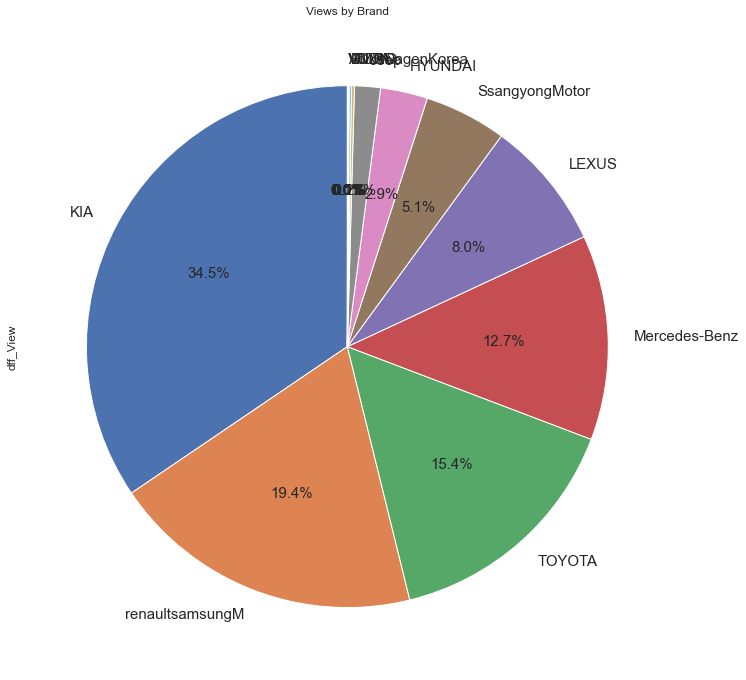

In [21]:
dff_view = rlt4['dff_View']
brand = rlt4['Brand']

rlt4['dff_View'].plot(kind='pie'
                      ,labels=rlt4['Brand']
                      ,figsize=(12,12)
                      ,autopct='%1.1f%%'
                      ,startangle=90
                      ,title='Views by Brand'
                      ,fontsize=15)

#### - 최근일주일 등록영상

In [22]:
qry11 = """
SELECT
 c.Video_title 
 ,c.VIdeo_id
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Channel_genre = 'Brand') c
WHERE c.Pub_date > '20210601' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry11)
rlt11 = cursor.fetchall()

rlt11 = pd.DataFrame(rlt11)

In [31]:
last_date = rlt11['Pub_date'].unique()[0]

In [33]:
aweek_ago = rlt11['Pub_date'].unique()[0] - datetime.timedelta(days=7)

In [40]:
df_rlt11 = pd.DataFrame(rlt11['Timestamp'].unique())

In [47]:
df_rlt11 = df_rlt11.sort_values(by=0, ascending=False).reset_index()

In [55]:
last_timestamp = df_rlt11.iloc[0].values[1]

In [57]:
new_video = rlt11[(rlt11['Pub_date']<= last_date) & (rlt11['Pub_date']>= aweek_ago) & (rlt11['Timestamp'] == last_timestamp)]

In [69]:
new_video = new_video[['Brand', 'Video_title','VIdeo_id','Pub_date','views']].sort_values(by='views', ascending=False)

In [72]:
new_video.reset_index(drop=True).head(10)

,Brand,Video_title,VIdeo_id,Pub_date,views
0,renaultsamsungM,내 멋진 XM3에 진심인 편 30s,z_S0EA7lrxw,2021-06-03,2249161
1,KIA,"The new Kia K9, 숨은 마스터들을 찾아서 (30s)",VQoLSaZwH20,2021-06-03,544434
2,TOYOTA,시에나 하이브리드 캠핑 (종합 세로 ver.),L6BGkiSWQFQ,2021-06-04,148978
3,LEXUS,[렉서스] TEAM LEXUS | 허다빈 프로의 TMI 퀵터뷰!,8MjVXajr8l8,2021-06-04,109073
4,TOYOTA,시에나 하이브리드 캠핑 (종합 ver.),g_m3l7La3S0,2021-06-04,105334
5,KIA,전기차에 대한 루머의 루머의 루머 | #전파남 EP.3 전기차 진실 파헤치기,50G4qp0pX_I,2021-06-02,84394
6,HYUNDAI,뉘르부르크링 24시 내구레이스 'Buckle Up for N' | 현대 N,AP8HssDapGU,2021-06-03,17000
7,KIA,생산기술부문 'AutoLand광명 생기계획팀' 직무 소개영상,hWMmYcVhvyo,2021-06-03,8353
8,KIA,품질부문 '전자품질보증팀' 직무 소개영상,CxAwWoD-7BM,2021-06-03,7869
9,KIA,생산운영부문 'AutoLand광명 품질관리부' 직무 소개영상,si_O6aY56nk,2021-06-03,7642


__________________

### ③ Brand detail / Toyota 기준

In [134]:
qry8 = """
SELECT
 c.Video_title
 ,c.Video_Id
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'TOYOTA') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry8)
rlt8 = cursor.fetchall()

rlt8 = pd.DataFrame(rlt8)

#### - 해당브랜드 총등록대수

In [135]:
brand = 'TOYOTA'

In [136]:
rlt6[rlt6['Brand'] == brand]['Video_cnt']

0    309
Name: Video_cnt, dtype: int64

#### - 해당브랜드 총구독자수

In [137]:
rlt2[rlt2['Brand'] == brand]['Subscribe']

3    11300
Name: Subscribe, dtype: int64

#### - 해당브랜드 총 views

In [138]:
rlt4[rlt4['Brand'] == brand]['View']

2    78535422
Name: View, dtype: int64

#### - 해당브랜드 신규 등록비디오수

In [139]:
rlt6[rlt6['Brand'] == brand]['dff_Video']

0    8
Name: dff_Video, dtype: int64

#### - 해당브랜드 신규 구독자수

In [140]:
rlt2[rlt2['Brand'] == brand]['diff_sub']

3    100
Name: diff_sub, dtype: int64

#### - 해당브랜드 신규 조회수

In [141]:
rlt4[rlt4['Brand'] == brand]['dff_View']

2    686060
Name: dff_View, dtype: int64

#### -최근 일주일 조회수|좋아요|싫어요

In [150]:
last_tstamp = rlt8['Timestamp'].unique()[-1] # 최근일자

In [151]:
aweeks_ago = rlt8['Timestamp'].unique()[-1] - datetime.timedelta(days=7) #최근일로부터 일주일

In [158]:
last_weekly = rlt8[(rlt8['Timestamp'] <= last_tstamp) & (rlt8['Timestamp'] >= aweeks_ago)] 
last_weekly = last_weekly.groupby(['Video_title', 'Video_Id'], as_index=False).sum()
last_weekly = last_weekly.sort_values(by='dff_views', ascending=False).reset_index(drop=True)
last_weekly = last_weekly[['Video_title', 'Video_Id', 'dff_views', 'dff_likes', 'dff_dislikes']]

In [159]:
last_weekly.head(5) # TOP5

,Video_title,Video_Id,dff_views,dff_likes,dff_dislikes
0,캠리 하이브리드 런칭(XLE Launching 15초 ver.),IUK2ey2Cku0,334576,2,0
1,캠리 하이브리드 런칭(XSE Launching 15초 ver.),UNPxhdmPfhc,318791,1,0
2,시에나 하이브리드 (ver. 엄마),aApydiR3WXY,121447,3,1
3,시에나 하이브리드 (ver. 아빠),F3v8zY9-bUs,116066,5,2
4,시에나 하이브리드 캠핑 (종합 세로 ver.),L6BGkiSWQFQ,67376,0,0


In [160]:
# Previously

In [163]:
tweeks_ago = aweeks_ago - datetime.timedelta(days=8)

In [166]:
previous_weekly = rlt8[(rlt8['Timestamp'] < aweeks_ago) & (rlt8['Timestamp'] >= tweeks_ago)] 
previous_weekly = previous_weekly.groupby(['Video_title', 'Video_Id'], as_index=False).sum()
previous_weekly = previous_weekly.sort_values(by='dff_views', ascending=False).reset_index(drop=True)
previous_weekly = previous_weekly[['Video_title', 'Video_Id', 'dff_views', 'dff_likes', 'dff_dislikes']]

In [169]:
last_weekly = pd.merge(last_weekly, previous_weekly, how='left', on='Video_Id')

In [174]:

last_weekly=last_weekly[["Video_title_x", "Video_Id", "dff_views_x", "dff_likes_x", "dff_dislikes_x"
                         ,"dff_views_y", "dff_likes_y", 'dff_dislikes_y']]

In [197]:
last_weekly = last_weekly.rename(columns = {"Video_title_x":"Video_tile"
                                      ,"Video_Id":"Video_Id"
                                      ,"dff_views_x":"dff_views"
                                      ,"dff_likes_x":"dff_likes"
                                      ,"dff_dislikes_x":"dff_likes"
                                      ,"dff_views_y":"Prev_views"
                                      ,"dff_likes_y":"Prev_likes"
                                      ,"dff_dislikes_y":"Prev_dislikes"})

In [198]:
last_weekly["증감"] = round(((last_weekly['dff_views'] - last_weekly['Prev_views'])/last_weekly['Prev_views'])*100,1)

In [199]:

last_weekly.head(10)

,Video_tile,Video_Id,dff_views,dff_likes,dff_likes,Prev_views,Prev_likes,Prev_dislikes,증감
0,캠리 하이브리드 런칭(XLE Launching 15초 ver.),IUK2ey2Cku0,334576,2,0,235765,0,0,41.9
1,캠리 하이브리드 런칭(XSE Launching 15초 ver.),UNPxhdmPfhc,318791,1,0,230107,0,0,38.5
2,시에나 하이브리드 (ver. 엄마),aApydiR3WXY,121447,3,1,79036,1,0,53.7
3,시에나 하이브리드 (ver. 아빠),F3v8zY9-bUs,116066,5,2,76402,4,2,51.9
4,시에나 하이브리드 캠핑 (종합 세로 ver.),L6BGkiSWQFQ,67376,0,0,43033,3,0,56.6
5,시에나 하이브리드 캠핑 (종합 ver.),g_m3l7La3S0,46733,2,0,32243,2,0,44.9
6,토요타 시에나 하이브리드 가이드 투어,-aXGzPHPaq8,6101,33,6,7435,25,11,-17.9
7,시에나 하이브리드 (ver. PENDULUM),2UhGvxXhkBM,544,5,2,355,6,2,53.2
8,와일드 하이브리드 캠리 런칭쇼,3mz0gB4ghI0,204,2,0,89,0,0,129.2
9,토요타 하이브리드 사륜구동 시스템: E-Four,uwKPPdSmxnA,173,2,1,107,1,0,61.7


#### - 지난 일주일간 조회수 상위5개 동영상 일별 조회수 변화

In [213]:
last_weekly['Video_tile'][:5]

0    캠리 하이브리드 런칭(XLE Launching 15초 ver.)
1    캠리 하이브리드 런칭(XSE Launching 15초 ver.)
2                    시에나 하이브리드 (ver. 엄마)
3                    시에나 하이브리드 (ver. 아빠)
4              시에나 하이브리드 캠핑 (종합 세로 ver.)
Name: Video_tile, dtype: object

In [204]:
daily_video = rlt8[(rlt8['Timestamp'] <= last_tstamp) & (rlt8['Timestamp'] >= aweeks_ago)] 

In [207]:
# 동영상 조회수 1위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][0]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
487,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-21,107893
488,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-22,24536
489,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-23,35005
490,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-24,29944
491,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-25,37618
492,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-26,34212
493,캠리 하이브리드 런칭(XLE Launching 15초 ver.),2021-06-28,65368


In [209]:
# 동영상 조회수 2위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][1]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
643,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-21,91596
644,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-22,37599
645,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-23,33668
646,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-24,27910
647,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-25,37659
648,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-26,20691
649,캠리 하이브리드 런칭(XSE Launching 15초 ver.),2021-06-28,69668


In [210]:
# 동영상 조회수 3위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][2]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
799,시에나 하이브리드 (ver. 엄마),2021-06-21,36938
800,시에나 하이브리드 (ver. 엄마),2021-06-22,13014
801,시에나 하이브리드 (ver. 엄마),2021-06-23,11818
802,시에나 하이브리드 (ver. 엄마),2021-06-24,12047
803,시에나 하이브리드 (ver. 엄마),2021-06-25,12041
804,시에나 하이브리드 (ver. 엄마),2021-06-26,11745
805,시에나 하이브리드 (ver. 엄마),2021-06-28,23844


In [211]:
# 동영상 조회수 4위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][3]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
903,시에나 하이브리드 (ver. 아빠),2021-06-21,35528
904,시에나 하이브리드 (ver. 아빠),2021-06-22,12424
905,시에나 하이브리드 (ver. 아빠),2021-06-23,11476
906,시에나 하이브리드 (ver. 아빠),2021-06-24,11362
907,시에나 하이브리드 (ver. 아빠),2021-06-25,12349
908,시에나 하이브리드 (ver. 아빠),2021-06-26,11207
909,시에나 하이브리드 (ver. 아빠),2021-06-28,21720


In [212]:
# 동영상 조회수 5위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][4]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
201,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-21,21035
202,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-22,6779
203,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-23,6802
204,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-24,6118
205,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-25,6657
206,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-26,6887
207,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-28,13098


------------

### ④ 인플루언서 브리프

#### - most video added

In [215]:
rlt5.head(1)

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,MOTline,2021-06-11,736,726,10


#### - most view increase

In [216]:
rlt3.head(1)

,Brand,Timestamp,View,Prev_View,dff_View
0,MOTline,2021-06-11,156866993,154191416,2675577


#### - most sub increase

In [217]:
rlt1.head(1)

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,MOCAR,2021-06-11,569000,566000,3000


#### - 최근일주일 총 조회수

In [219]:
rlt3['dff_View'].sum()

8768253

#### - 최근 일주일 총 조회수의 브랜드별 비중

<AxesSubplot:title={'center':'Views by Brand'}, ylabel='dff_View'>

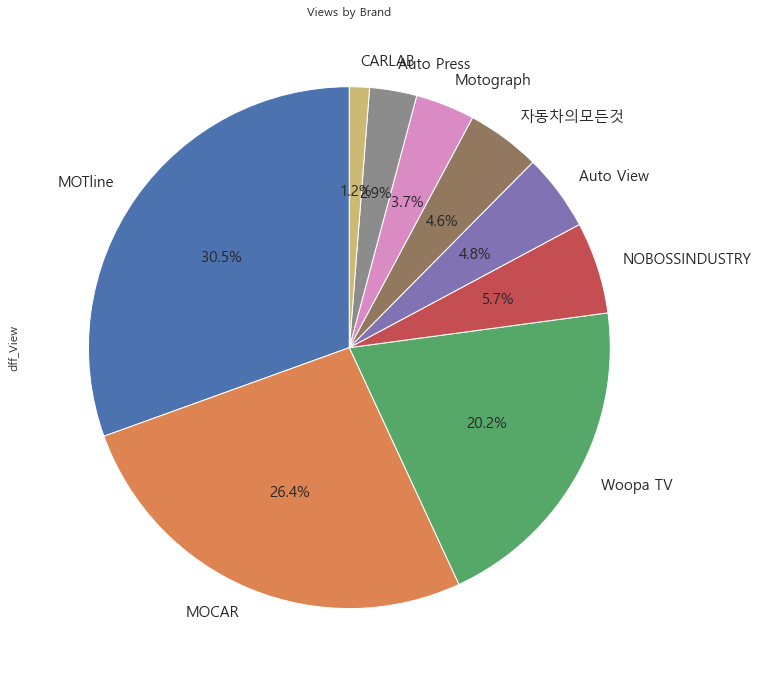

In [223]:
dff_view = rlt3['dff_View']
brand = rlt3['Brand']

rlt3['dff_View'].plot(kind='pie'
                      ,labels=rlt3['Brand']
                      ,figsize=(12,12)
                      ,autopct='%1.1f%%'
                      ,startangle=90
                      ,title='Views by Brand'
                      ,fontsize=15)

#### - 일주일간 등록동영상

In [230]:
qry12 = """
SELECT
 c.Video_title 
 ,c.VIdeo_id
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Channel_genre = 'Influencer') c
WHERE c.Pub_date > '20210521' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry12)
rlt12 = cursor.fetchall()

rlt12 = pd.DataFrame(rlt12)

In [231]:
last_date = rlt12['Pub_date'].unique()[0]

In [232]:
aweek_ago = rlt12['Pub_date'].unique()[0] - datetime.timedelta(days=7)

In [235]:
df_rlt12 = pd.DataFrame(rlt12['Timestamp'].unique())

In [236]:
df_rlt12 = df_rlt12.sort_values(by=0, ascending=False).reset_index()

In [237]:
last_timestamp = df_rlt12.iloc[0].values[1]

In [238]:
new_video = rlt12[(rlt12['Pub_date']<= last_date) & (rlt12['Pub_date']>= aweek_ago) & (rlt12['Timestamp'] == last_timestamp)]

In [239]:
new_video = new_video[['Brand', 'Video_title','VIdeo_id','Pub_date','views']].sort_values(by='views', ascending=False)

In [240]:
new_video.reset_index(drop=True).head(10)

,Brand,Video_title,VIdeo_id,Pub_date,views
0,Woopa TV,"현대에서 나온 3천만원 ""미니 소형 카니발"" 신형 쿠스토 공개!",uITHywOxW_c,2021-06-02,657519
1,MOCAR,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",HeqS68f0rlM,2021-06-02,634762
2,MOTline,타이칸은 끝났다 #Shorts,YfSQYJAYoKY,2021-05-30,393909
3,MOCAR,기아 스포티지 풀체인지 실내외 미리 공개! 살펴보니!...사전 계약 6월말! 현대 ...,d8hmtjZSuwQ,2021-05-31,366156
4,MOTline,BMW M 차주들이 제일 싫어하는 미친 가성비 자연흡기 V8 450마력 쿠페,sKltC2HXXBY,2021-06-04,354535
5,Woopa TV,"?국내 출시 시급? 신형 싼타크루즈 실물 최초 발견!! ""완전 대박! 국내 3천만원...",GP2iHtbHrWs,2021-06-01,341627
6,MOCAR,신형 기아 K9 공개! 제네시스 G80 사러갔다 ‘이왕이면?’…가격 싸고 더 젊어졌다!,JmnIZvuOCB4,2021-06-03,320423
7,MOCAR,"현대차 스타리아, 신차 창문 박살나는 문제 발생! 생산도 차질",5U_OS3B48AI,2021-05-30,252539
8,Woopa TV,신형인데 3천만원 할인?! 없어서 못사는 BMW X7 40i 직접 출고했습니다!,gceI3au9LqY,2021-05-30,189813
9,MOTline,"800만원짜리 썩은 중고 아우디 3천만원 들여 고치기 [똥차 고쳐서 후리기 시즌1,...",sh_0_phThoI,2021-05-28,185511


#### - 타이틀 단어빈도수

In [242]:
qry9 = """
SELECT
 c.Video_title 
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Channel_genre = 'Influencer') c
WHERE c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry9)
rlt9 = cursor.fetchall()

rlt9 = pd.DataFrame(rlt9)

In [243]:
Video = rlt9[["Video_title", 'Channel_genre', 'Pub_date', 'dff_views']].groupby(by=["Video_title","Channel_genre","Pub_date"], as_index=False).sum()

In [244]:
Video

,Video_title,Channel_genre,Pub_date,dff_views
0,! 벤츠는 최고다 ! 근데 썩어 들어가는 준치..?,Influencer,2020-12-28,19
1,"""100%리얼 비오는 밤12시22분""엔진체크 점등!출력부족!집에 갈 수있을까?[자동...",Influencer,2020-08-25,69
2,"""10만km 이상 운행했다면""교환주기 놓치면 큰 돈 들어가는 부품이있다?![자동차의...",Influencer,2020-08-25,16882
3,"""1999년식XG-엔진룸 크리닝""19년만에 처음 목욕 합니다.속이후련합니다 이정도는...",Influencer,2018-03-22,867
4,"""1억7천만원짜리 포크레인"" 출고하면 과연 어떤 선물을 줄까?! 국내 최초 굴착기 ...",Influencer,2021-04-01,8008
...,...,...,...,...
7519,"휴대용 에어펌프는 과연 쓸만할까? 샤오미, 아이나비 에어펌프 VS OE 에어펌프 |...",Influencer,2021-04-22,3592
7520,"휴대폰 케이블, 중복투자는 이제 그만!! [케블라 휴대폰 케이블로 911견인 실험]",Influencer,2020-10-05,18
7521,희소성 甲! 국내 1대 수입 슈퍼카는 한 달 뒤 떡상할까? 떡락할까?,Influencer,2019-07-18,76
7522,힘들게 촬영했습니다.. 하이퍼카보다도 보기 힘들다는 페라리..! 우파TV에서 최초로...,Influencer,2019-08-12,49


In [262]:
pub_date = pd.DataFrame(Video['Pub_date'].unique()).sort_values(by=0, ascending=False)
pub_date = pub_date.reset_index(drop=True)

In [271]:
pub_date

,0
0,2021-06-04
1,2021-06-03
2,2021-06-02
3,2021-06-01
4,2021-05-31
...,...
1863,2015-01-27
1864,2015-01-22
1865,2014-07-13
1866,2013-10-23


In [275]:
Video['Pub_date'][0]

datetime.date(2020, 12, 28)

In [ ]:
text = Video['Video_title']

In [277]:
import datetime

In [279]:
Video['Year'] = pd.DatetimeIndex(Video['Pub_date']).year
Video['Month']= pd.DatetimeIndex(Video['Pub_date']).month
Video['Quarter']= pd.DatetimeIndex(Video['Pub_date']).quarter

In [289]:
text_2021 = Video[Video['Year'] == 2021][['Video_title']]

In [290]:
text_2020 = Video[Video['Year'] == 2020][['Video_title']]

In [291]:
import nltk
from konlpy.tag import Okt

In [292]:
t = Okt()

In [324]:
# 21년도 빈도수

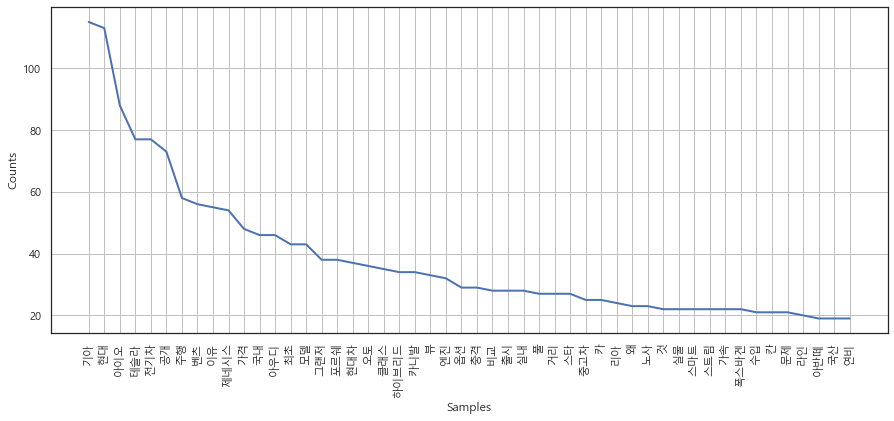

In [332]:
present_candi_text_21 = text_2021['Video_title'].values

present_text_21 = ''

for each_line in present_candi_text_21:
    present_text_21 = present_text_21 + each_line + '\n'
    
    
tokens_ko_21 = t.nouns(present_text_21)    


stop_words = ['승기', '이', '부', '편', '급', '더', '를', '거', '말', '의', '뭐', '알', '차', '닉', '신형', '리뷰', '뉴', '자동차']
tokens_ko_21 = [each_word for each_word in tokens_ko_21 if each_word not in stop_words]


ko_21 = nltk.Text(tokens_ko_21, name='자동차리뷰분석')
# ko_21.vocab().most_common()

plt.figure(figsize=(15,6))
ko_21.plot(50)
plt.show()

In [ ]:
# 20년도 빈도수

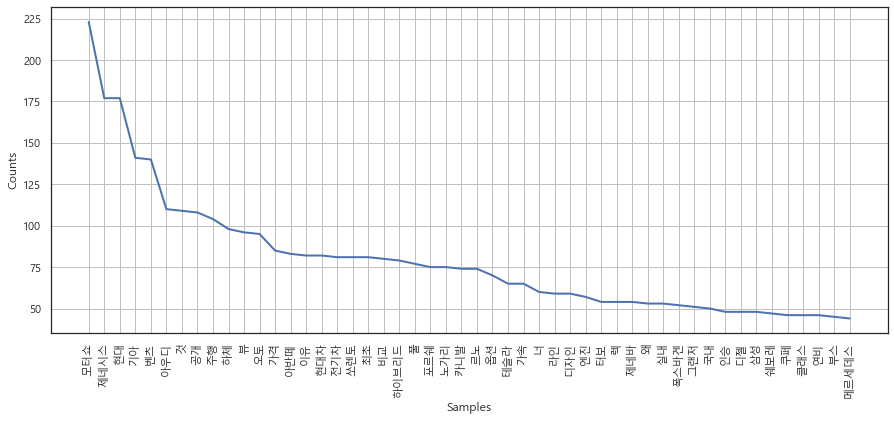

In [331]:
present_candi_text_20 = text_2020['Video_title'].values

present_text_20 = ''

for each_line in present_candi_text_20:
    present_text_20 = present_text_20 + each_line + '\n'
    
    
tokens_ko_20 = t.nouns(present_text_20)    


stop_words = ['승기', '이', '부', '편', '급', '더', '를', '거', '말', '의', '뭐', '알', '차', '닉', '신형', '리뷰', '뉴', '자동차'
             ,'노', '보스', '노사']
tokens_ko_20 = [each_word for each_word in tokens_ko_20 if each_word not in stop_words]


ko_20 = nltk.Text(tokens_ko_20, name='자동차리뷰분석')
# ko_21.vocab().most_common()

plt.figure(figsize=(15,6))
ko_20.plot(50)
plt.show()

In [333]:
# 워드클라우드

In [335]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [337]:
data21 = ko_21.vocab().most_common(300)
wordcloud21 = WordCloud(font_path=f_path,
                     relative_scaling = 0.5,
                     background_color = 'white',).generate_from_frequencies(dict(data21))

data20 = ko_20.vocab().most_common(300)
wordcloud20 = WordCloud(font_path=f_path,
                     relative_scaling = 0.5,
                     background_color = 'white',).generate_from_frequencies(dict(data20))

In [ ]:
# 2021년

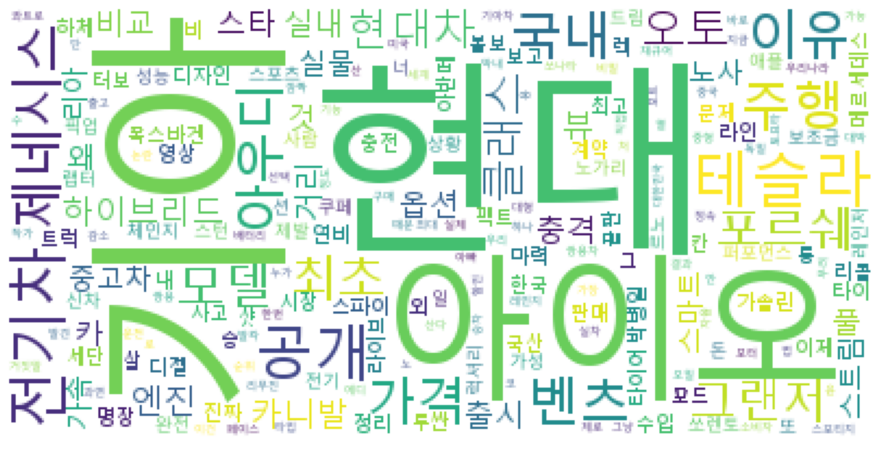

In [339]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud21)
plt.axis('off')
plt.show()

In [ ]:
# 2021년

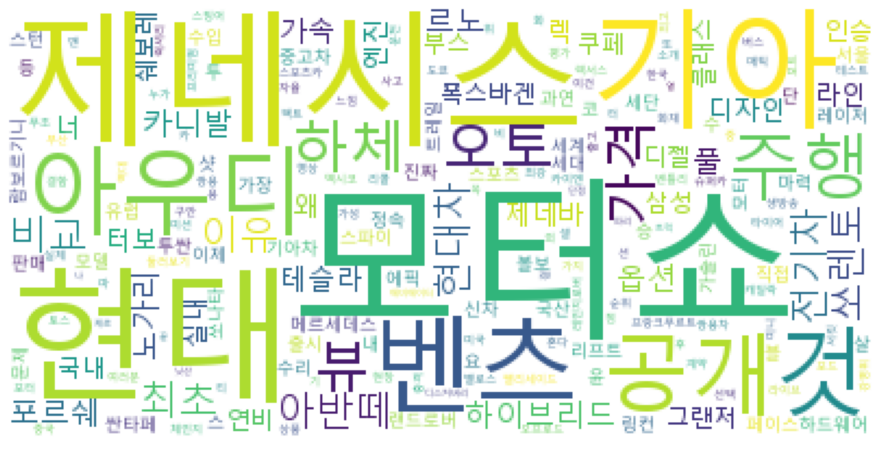

In [340]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud20)
plt.axis('off')
plt.show()

#### - 댓글빈도수

----

### ⑤ 인플루언서 디테일

In [342]:
qry13 = """
SELECT
 c.Video_title
 ,c.Video_Id
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'MOCAR') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry13)
rlt13 = cursor.fetchall()

rlt13 = pd.DataFrame(rlt13)

#### - 해당브랜드 총등록대수

In [347]:
brand = "MOCAR"

In [348]:
rlt5[rlt5['Brand'] == brand]['Video_cnt']

1    1067
Name: Video_cnt, dtype: int64

#### - 해당브랜드 총구독자수

In [349]:
rlt1[rlt1['Brand'] == brand]['Subscribe']

0    569000
Name: Subscribe, dtype: int64

#### -해당브랜드 총조회수

In [350]:
rlt3[rlt3['Brand'] == brand]['View']

1    238264656
Name: View, dtype: int64


#### - 최근일주일간 증감

In [353]:
# 신규등록
rlt5[rlt5['Brand'] == brand]['dff_Video']

1    10
Name: dff_Video, dtype: int64

In [354]:
# 구독자수
rlt1[rlt1['Brand'] == brand]['diff_sub']

0    3000
Name: diff_sub, dtype: int64

In [356]:
# 조회수
rlt3[rlt3['Brand'] == brand]['dff_View']

1    2313759
Name: dff_View, dtype: int64

In [ ]:
#### - 최근일주일 동영상별 조회수|좋아요|싫어요

In [357]:
last_tstamp = rlt13['Timestamp'].unique()[-1] # 최근일자
aweeks_ago = rlt13['Timestamp'].unique()[-1] - datetime.timedelta(days=7) #최근일로부터 일주일

last_weekly = rlt13[(rlt13['Timestamp'] <= last_tstamp) & (rlt13['Timestamp'] >= aweeks_ago)] 
last_weekly = last_weekly.groupby(['Video_title', 'Video_Id'], as_index=False).sum()
last_weekly = last_weekly.sort_values(by='dff_views', ascending=False).reset_index(drop=True)
last_weekly = last_weekly[['Video_title', 'Video_Id', 'dff_views', 'dff_likes', 'dff_dislikes']]

In [358]:
tweeks_ago = aweeks_ago - datetime.timedelta(days=8)

previous_weekly = rlt13[(rlt13['Timestamp'] < aweeks_ago) & (rlt13['Timestamp'] >= tweeks_ago)] 
previous_weekly = previous_weekly.groupby(['Video_title', 'Video_Id'], as_index=False).sum()
previous_weekly = previous_weekly.sort_values(by='dff_views', ascending=False).reset_index(drop=True)
previous_weekly = previous_weekly[['Video_title', 'Video_Id', 'dff_views', 'dff_likes', 'dff_dislikes']]


last_weekly = pd.merge(last_weekly, previous_weekly, how='left', on='Video_Id')



last_weekly=last_weekly[["Video_title_x", "Video_Id", "dff_views_x", "dff_likes_x", "dff_dislikes_x"
                         ,"dff_views_y", "dff_likes_y", 'dff_dislikes_y']]



last_weekly = last_weekly.rename(columns = {"Video_title_x":"Video_tile"
                                      ,"Video_Id":"Video_Id"
                                      ,"dff_views_x":"dff_views"
                                      ,"dff_likes_x":"dff_likes"
                                      ,"dff_dislikes_x":"dff_likes"
                                      ,"dff_views_y":"Prev_views"
                                      ,"dff_likes_y":"Prev_likes"
                                      ,"dff_dislikes_y":"Prev_dislikes"})

last_weekly["증감"] = round(((last_weekly['dff_views'] - last_weekly['Prev_views'])/last_weekly['Prev_views'])*100,1)
last_weekly.head(10)

,Video_tile,Video_Id,dff_views,dff_likes,dff_likes,Prev_views,Prev_likes,Prev_dislikes,증감
0,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",HeqS68f0rlM,23934,84,9,64014,209,19,-62.6
1,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",s3Cbwmsxggw,23254,142,8,17315,111,7,34.3
2,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,PkmFMYNN_yo,21943,94,8,23108,76,10,-5.0
3,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,PFrtVec3RVY,21496,214,15,35076,353,18,-38.7
4,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,-6SZcV60pHc,21250,102,7,27716,113,8,-23.3
5,"현대차 아이오닉5 시승기...시승차 가격 5800만원 풀옵션, 보조금만 1200만원...",0V1MTlqWOOQ,20911,52,11,23983,76,13,-12.8
6,현대가 내놓는 SUV 경차 AX1! 그런데 갑자기 광주형 일자리!?,JJN8gGBs8Ps,20606,153,15,3343,31,3,516.4
7,"""아이오닉, 테슬라 전기차 절대 사지 마라! 충전기 없으면""...쓰지 않는 급속 충...",AvwQd0yG5ck,19274,171,3,8289,73,0,132.5
8,"전기 트럭이 제로백 3초! 리비안, 한국시장 왔다!...아이오닉, 테슬라 사이버트럭...",hVE0CCYLbR0,15083,71,5,16267,92,5,-7.3
9,"기아 K8 3.5 풀옵션 시승기…시승차 가격 4912만원, 엔진,실내까지! 그랜저는...",XV43_s5zCWo,12623,37,5,14716,41,5,-14.2


#### - 최근 일주일 일별 동영상 증감

In [361]:
daily_video = rlt13[(rlt13['Timestamp'] <= last_tstamp) & (rlt13['Timestamp'] >= aweeks_ago)] 

In [362]:
# 동영상 조회수 1위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][0]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
27,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-21,6843
28,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-22,2950
29,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-23,2294
30,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-24,2234
31,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-25,2363
32,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-26,2359
33,"기아 EV6 GT 실내외 살펴보니! 신차발표 현장!…주행거리 450km, 롱레인지 ...",2021-06-28,4891


In [363]:
# 동영상 조회수 2위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][1]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
1574,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-21,5599
1575,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-22,2649
1576,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-23,2837
1577,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-24,2416
1578,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-25,2298
1579,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-26,2088
1580,"전기차 카누(Canoo) 픽업트럭! 가격 3700만원, 실화냐?...현대차와 제휴?...",2021-06-28,5367


In [365]:
# 동영상 조회수 3위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][2]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
418,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-21,5209
419,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-22,2627
420,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-23,2309
421,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-24,2166
422,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-25,1936
423,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-26,2566
424,기아 K8 하이브리드 시승기!…전기 모터만으로도 달리는 K8이라니! 1.6 터보에 ...,2021-06-28,5130


In [366]:
# 동영상 조회수 4위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][3]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
146,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-21,4500
147,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-22,2178
148,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-23,1838
149,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-24,2089
150,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-25,2314
151,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-26,2491
152,현대차 완전자율주행차 6개월내 나온다!…택시 운전사 없어진다? 직업이 사라지는 세상 ㅠㅠ,2021-06-28,6086


In [367]:
# 동영상 조회수 5위
daily_video[daily_video['Video_title']==last_weekly['Video_tile'][4]][["Video_title",'Timestamp','dff_views']]

,Video_title,Timestamp,dff_views
163,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-21,3836
164,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-22,2510
165,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-23,2430
166,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-24,2528
167,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-25,2155
168,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-26,2787
169,포르쉐 타이칸 공포의 시승기! 전기차 인증 주행 거리 290km인데 350km 산길...,2021-06-28,5004


-------

-----